In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [4]:
df_ice_cream = pd.read_csv('ice_cream.csv')

In [5]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [9]:
#ACF Auto correlation function,Partial Auto correlation
df_ice_cream.rename(columns={'DATE':'date','IPN31152N':'Production'}, inplace=True)

In [10]:
df_ice_cream.head()

,date,Production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [12]:
#convert data column to datetime type
df_ice_cream['date']=pd.to_datetime(df_ice_cream.date)

In [14]:
#set date as index
df_ice_cream.set_index('date',inplace=True)

In [15]:
#just get data from 2010 onwards
start_date=pd.to_datetime('2010-01-01')
df_ice_cream=df_ice_cream[start_date:]

In [16]:
df_ice_cream.head()

,Production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


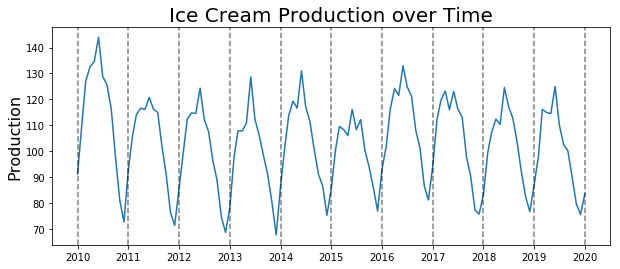

In [33]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.Production)
plt.title('Ice Cream Production over Time',fontsize=20)
plt.ylabel('Production',fontsize=16)
for year in range (2010,2021):
    plt.axvline(pd.to_datetime(str(year)+'-'+'01-01'),color='k',linestyle='--',alpha=0.5)

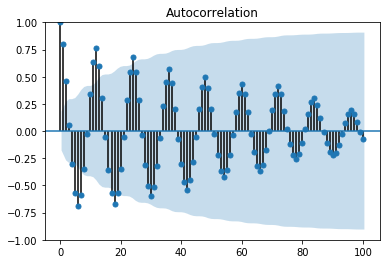

In [35]:
#Acf
Acf_plot = plot_acf(df_ice_cream.Production,lags=100)

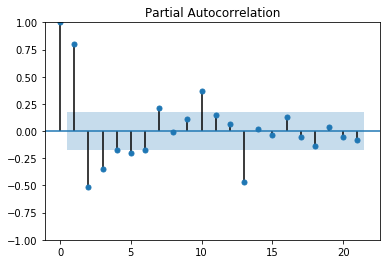

In [37]:
#PACF
pacf_plot=plot_pacf(df_ice_cream.Production,method='ywm')

In [38]:
#Bsed on PACF, we should start with an Auto regressive modelwith lags 1,2,3,10,13(AR model)
import yfinance as yf

In [39]:
tickerSymbol='SPY'
tickerData=yf.Ticker(tickerSymbol)
tickerDf=tickerData.history(period='1d',start='2015-1-1',end='2020-1-1')

In [40]:
tickerDf = tickerDf[['Close']]

In [41]:
tickerDf.head()

,Close
Date,
2014-12-31,179.880402
2015-01-02,179.784119
2015-01-05,176.537338
2015-01-06,174.874496
2015-01-07,177.053635


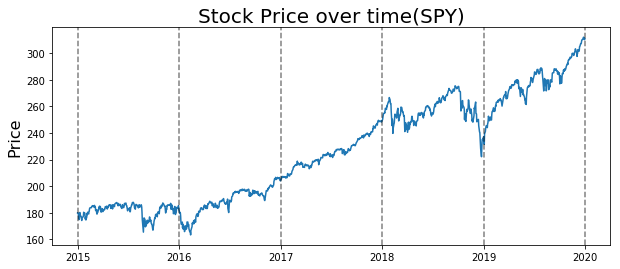

In [42]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over time(%s)'%tickerSymbol,fontsize=20)
plt.ylabel('Price',fontsize=16)
for year in range (2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-'+'01-01'),color='k',linestyle='--',alpha=0.5)

In [44]:
#The data set is not stationary
#Stationarity: take first difference of this series
first_diff = tickerDf.Close.values[1:]- tickerDf.Close.values[:-1]
first_diff = np.concatenate([first_diff,[0]])

In [46]:
tickerDf['FirstDifference']=first_diff

In [48]:
tickerDf.head()

,Close,FirstDifference
Date,,
2014-12-31,179.880402,-0.096283
2015-01-02,179.784119,-3.246780
2015-01-05,176.537338,-1.662842
2015-01-06,174.874496,2.179138
2015-01-07,177.053635,3.141800


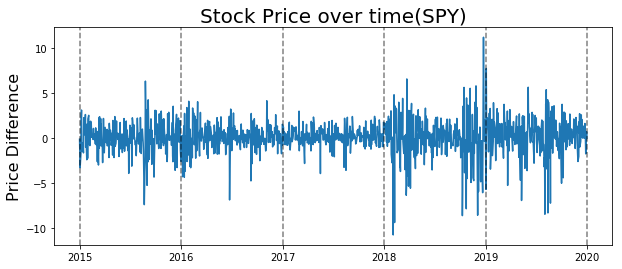

In [49]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('Stock Price over time(%s)'%tickerSymbol,fontsize=20)
plt.ylabel('Price Difference',fontsize=16)
for year in range (2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-'+'01-01'),color='k',linestyle='--',alpha=0.5)

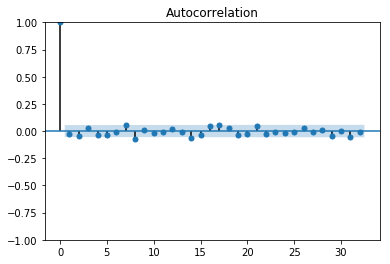

In [50]:
acf_plot=plot_acf(tickerDf.FirstDifference)

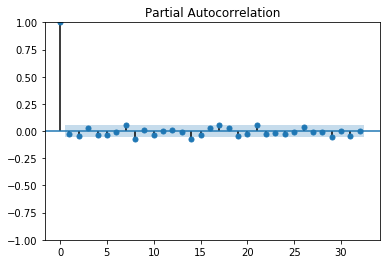

In [53]:
pacf_plot=plot_pacf(tickerDf.FirstDifference,method='ywm')